
### Recent Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.

### This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.

### – a not for profit organization dedicated to manage the functioning of Hospitals in a professional and optimal manner.
### The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.


- ### Variables : 
- Column	- Description
- case_id	- Case_ID registered in Hospital
- Hospital_code - Unique code for the Hospital
- Hospital_type_code - Unique code for the type of Hospital
- City_Code_Hospital	- City Code of the Hospital
- Hospital_region_code - Region Code of the Hospital
- Available Extra Rooms in Hospital - Number of Extra rooms available in the Hospital
- Department - Department overlooking the case
- Ward_Type	- Code for the Ward type
- Ward_Facility_Code	- Code for the Ward Facility
- Bed Grade	- Condition of Bed in the Ward
- patientid	- Unique Patient Id
- City_Code_Patient	- City Code for the patient
- Type of Admission	- Admission Type registered by the Hospital
- Severity of Illness	- Severity of the illness recorded at the time of admission
- Visitors with Patient	- Number of Visitors with the patient
- Age	- Age of the patient
- Admission_Deposit	- Deposit at the Admission Time
- Stay	- Stay Days by the patient


In [23]:
import numpy as np 
import pandas as pd 

In [24]:
from numpy import mean, std
import seaborn as sns
from matplotlib import *
from matplotlib import pyplot as plt
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

In [25]:
train_data = pd.read_csv(r'train_data.csv')
train_data.head()

case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0        1              8                  c                   3   
1        2              2                  c                   5   
2        3             10                  e                   1   
3        4             26                  b                   2   
4        5             26                  b                   2   

  Hospital_region_code  Available Extra Rooms in Hospital    Department  \
0                    Z                                  3  radiotherapy   
1                    Z                                  2  radiotherapy   
2                    X                                  2    anesthesia   
3                    Y                                  2  radiotherapy   
4                    Y                                  2  radiotherapy   

  Ward_Type Ward_Facility_Code  Bed_Grade  patientid  City_Code_Patient  \
0         R                  F        2.0      31397                7.0   
1         S                  F        2.0      31397                7.0   
2         S                  E        2.0      31397                7.0   
3         R                  D        2.0      31397                7.0   
4         S                  D        2.0      31397                7.0   

  Type_of_Admission Severity of Illness  Visitors_with_Patient    Age  \
0         Emergency             Extreme                      2  51-60   
1            Trauma             Extreme                      2  51-60   
2            Trauma             Extreme                      2  51-60   
3            Trauma             Extreme                      2  51-60   
4            Trauma             Extreme                      2  51-60   

   Admission_Deposit   Stay  
0               4911   0-10  
1               5954  41-50  
2               4745  31-40  
3               7272  41-50  
4               5558  41-50

In [26]:
train_data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed_Grade',
       'patientid', 'City_Code_Patient', 'Type_of_Admission',
       'Severity of Illness', 'Visitors_with_Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [27]:
train_data.rename(columns = {'Bed Grade':'Bed_Grade', 'Type of Admission':'Type_of_Admission','Visitors with Patient':'Visitors_with_Patient'}, inplace = True)

In [21]:
import pandas_profiling as pp
pp.ProfileReport(train_data)

In [28]:
test_data = pd.read_csv('test_data.csv')
test_data.head()

case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
0   318439             21                  c                   3   
1   318440             29                  a                   4   
2   318441             26                  b                   2   
3   318442              6                  a                   6   
4   318443             28                  b                  11   

  Hospital_region_code  Available Extra Rooms in Hospital  Department  \
0                    Z                                  3  gynecology   
1                    X                                  2  gynecology   
2                    Y                                  3  gynecology   
3                    X                                  3  gynecology   
4                    X                                  2  gynecology   

  Ward_Type Ward_Facility_Code  Bed Grade  patientid  City_Code_Patient  \
0         S                  A        2.0      17006                2.0   
1         S                  F        2.0      17006                2.0   
2         Q                  D        4.0      17006                2.0   
3         Q                  F        2.0      17006                2.0   
4         R                  F        2.0      17006                2.0   

  Type of Admission Severity of Illness  Visitors with Patient    Age  \
0         Emergency            Moderate                      2  71-80   
1            Trauma            Moderate                      4  71-80   
2         Emergency            Moderate                      3  71-80   
3            Trauma            Moderate                      3  71-80   
4            Trauma            Moderate                      4  71-80   

   Admission_Deposit  
0             3095.0  
1             4018.0  
2             4492.0  
3             4173.0  
4             4161.0

In [29]:
test_data.rename(columns = {'Bed Grade':'Bed_Grade', 'Type of Admission':'Type_of_Admission','Visitors with Patient':'Visitors_with_Patient'}, inplace = True)

In [30]:
train_data.shape

(318438, 18)

In [31]:
train_data.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed_Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type_of_Admission                     object
Severity of Illness                   object
Visitors_with_Patient                  int64
Age                                   object
Admission_Deposit                      int64
Stay                                  object
dtype: object

In [32]:
train_data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type_of_Admission                       0
Severity of Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [33]:
train_data.nunique()

case_id                              318438
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed_Grade                                 4
patientid                             92017
City_Code_Patient                        37
Type_of_Admission                         3
Severity of Illness                       3
Visitors_with_Patient                    28
Age                                      10
Admission_Deposit                      7300
Stay                                     11
dtype: int64

In [34]:
train_data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed_Grade',
       'patientid', 'City_Code_Patient', 'Type_of_Admission',
       'Severity of Illness', 'Visitors_with_Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [35]:
# Unique values for all the columns
for col in train_data.columns[~(train_data.columns.isin(['case_id', 'patientid', 'admission_deposit']))].tolist():
    print(" Unique Values --> " + col, ':', len(train_data[col].unique()), ': ', train_data[col].unique())

 Unique Values --> Hospital_code : 32 :  [ 8  2 10 26 23 32  1 22 16  9  6 29 12  3 21 28 27 19  5 14 13 31 24 17
 25 15 11 30 18  4  7 20]
 Unique Values --> Hospital_type_code : 7 :  ['c' 'e' 'b' 'a' 'f' 'd' 'g']
 Unique Values --> City_Code_Hospital : 11 :  [ 3  5  1  2  6  9 10  4 11  7 13]
 Unique Values --> Hospital_region_code : 3 :  ['Z' 'X' 'Y']
 Unique Values --> Available Extra Rooms in Hospital : 18 :  [ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24]
 Unique Values --> Department : 5 :  ['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']
 Unique Values --> Ward_Type : 6 :  ['R' 'S' 'Q' 'P' 'T' 'U']
 Unique Values --> Ward_Facility_Code : 6 :  ['F' 'E' 'D' 'B' 'A' 'C']
 Unique Values --> Bed_Grade : 5 :  [ 2.  3.  4.  1. nan]
 Unique Values --> City_Code_Patient : 38 :  [ 7.  8.  2.  5.  6.  3.  4.  1.  9. 14. nan 25. 15. 12. 10. 28. 24. 23.
 20. 11. 13. 21. 18. 16. 26. 27. 22. 19. 31. 34. 32. 30. 29. 37. 33. 35.
 36. 38.]
 Unique Values --> Type

- ## Exploratory Data Analysis :

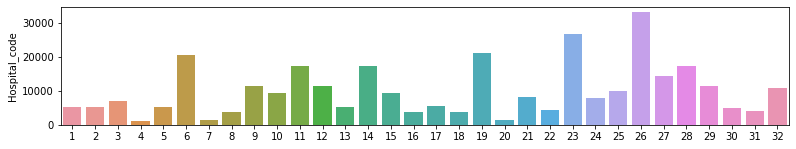

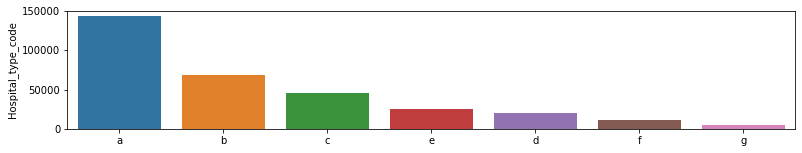

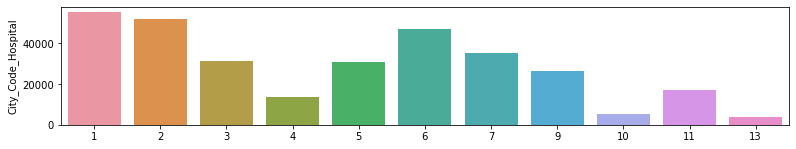

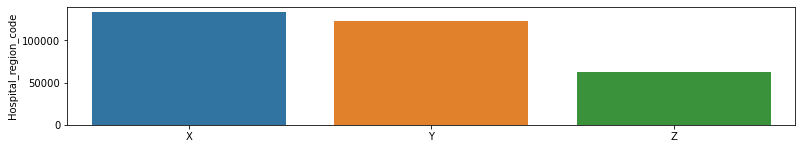

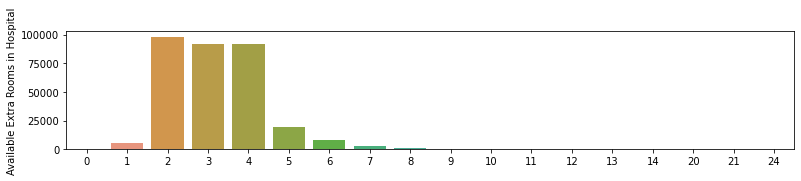

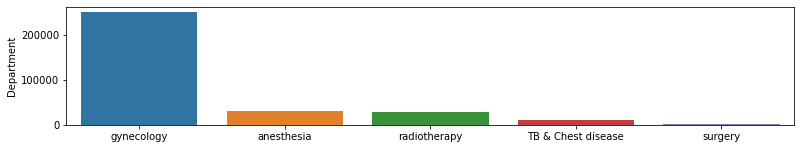

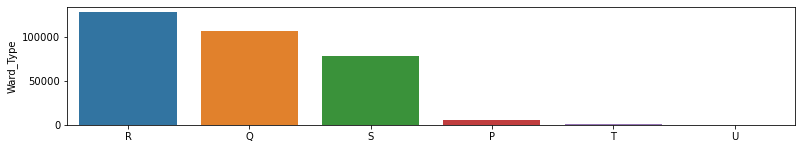

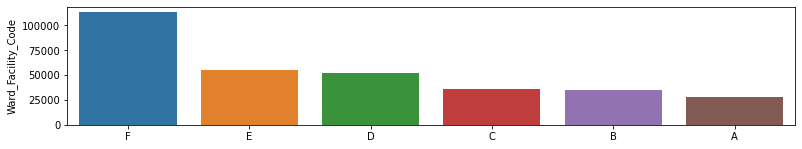

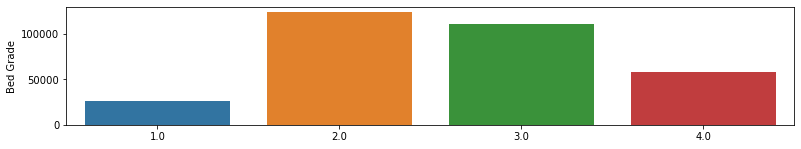

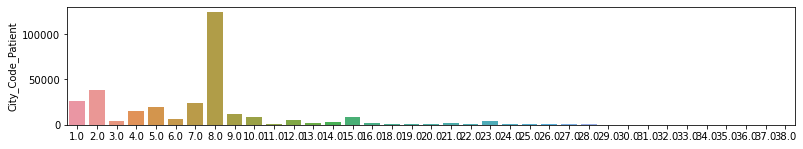

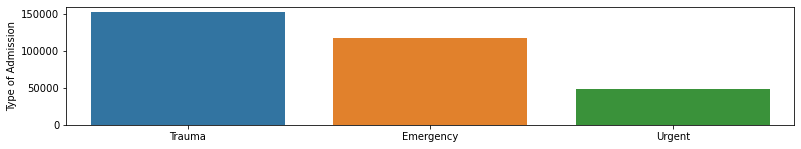

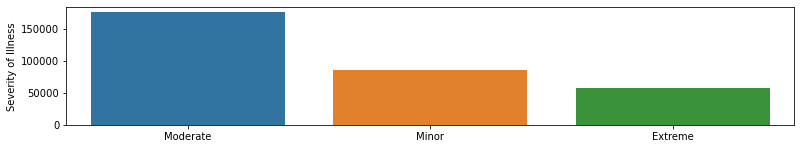

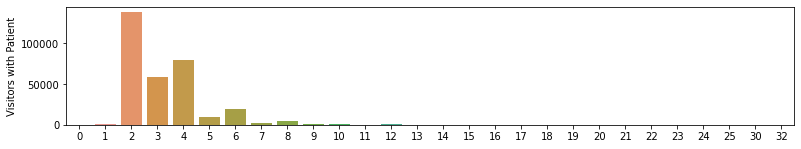

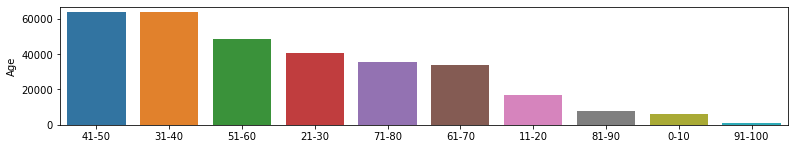

KeyboardInterrupt: 

In [13]:
i = 1
for column in train_data.columns[~(train_data.columns.isin(['case_id', 'patientid', 'admission_deposit']))].tolist():
    plt.figure(figsize = (60, 10))
    plt.subplot(4, 4, i)
    sns.barplot(x = train_data[column].value_counts().index, y = train_data[column].value_counts())
    i += 1
    plt.show()

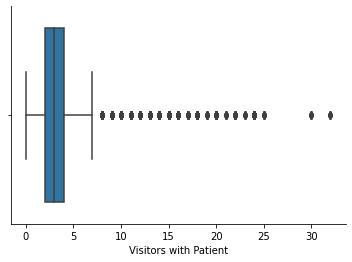

In [26]:
sns.boxplot(x = 'Visitors with Patient', data = train_data)
sns.despine()

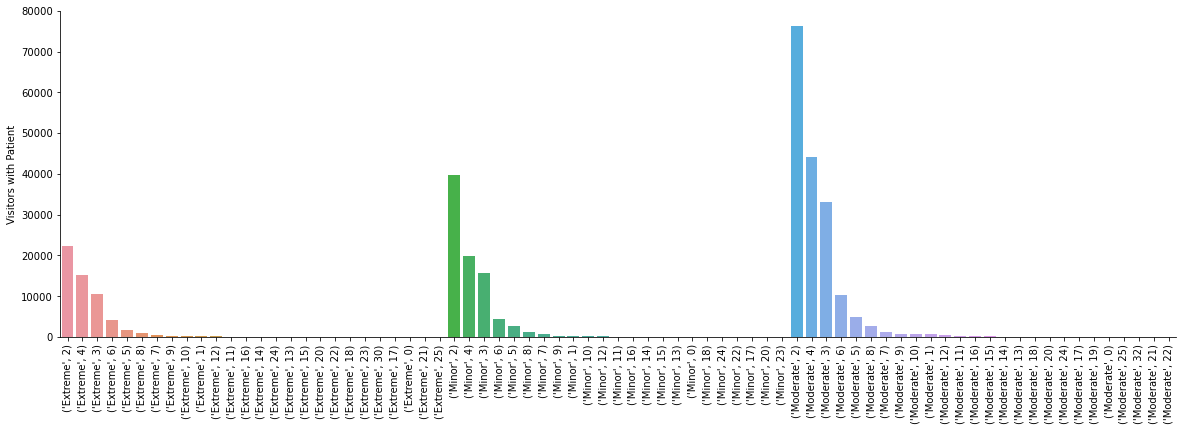

In [28]:
plt.figure(figsize = (20, 6))
sns.barplot(x = train_data.groupby(['Severity of Illness'])['Visitors with Patient'].value_counts().index, y = train_data.groupby(['Severity of Illness'])['Visitors with Patient'].value_counts())
plt.xticks(rotation = 90)
sns.despine()

In [36]:
train_data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed_Grade',
       'patientid', 'City_Code_Patient', 'Type_of_Admission',
       'Severity of Illness', 'Visitors_with_Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [37]:
train_data = train_data.fillna('NaN')
test_data = test_data.fillna('NaN')

for column in train_data.columns[~(train_data.columns.isin(['case_id', 'Stay']))].tolist():

    le = LabelEncoder()

    if column == 'City_Code_Patient':
        train_data['City_Code_Patient'] = train_data['City_Code_Patient'].astype('str')
        test_data['City_Code_Patient'] = test_data['City_Code_Patient'].astype('str')
        train_data['City_Code_Patient'] = le.fit_transform(train_data['City_Code_Patient'])
        test_data['City_Code_Patient'] = le.fit_transform(test_data['City_Code_Patient'])
    
    elif column == 'Bed Grade':
        bedGrade = {1.0: '1',2.0: '2', 3.0: '3', 4.0: '4', np.nan: '5'}
        train_data['Bed_Grade'] = train_data['Bed_Grade'].map(bedGrade)
        test_data['Bed_Grade'] = test_data['Bed_Grade'].map(bedGrade)
        train_data['Bed_Grade'] = train_data['Bed_Grade'].fillna('NaN')
        test_data['Bed_Grade'] = test_data['Bed_Grade'].fillna('NaN')
    
    else:
        train_data[column] = le.fit_transform(train_data[column])
        test_data[column] = le.fit_transform(test_data[column])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [38]:
train_data.head()

case_id  Hospital_code  Hospital_type_code  City_Code_Hospital  \
0        1              7                   2                   2   
1        2              1                   2                   4   
2        3              9                   4                   0   
3        4             25                   1                   1   
4        5             25                   1                   1   

   Hospital_region_code  Available Extra Rooms in Hospital  Department  \
0                     2                                  3           3   
1                     2                                  2           3   
2                     0                                  2           1   
3                     1                                  2           3   
4                     1                                  2           3   

   Ward_Type  Ward_Facility_Code Bed_Grade  patientid City_Code_Patient  \
0          2                   5         2      31397                 7   
1          3                   5         2      31397                 7   
2          3                   4         2      31397                 7   
3          2                   3         2      31397                 7   
4          3                   3         2      31397                 7   

  Type_of_Admission Severity of Illness  Visitors_with_Patient    Age  \
0         Emergency             Extreme                      2  51-60   
1            Trauma             Extreme                      2  51-60   
2            Trauma             Extreme                      2  51-60   
3            Trauma             Extreme                      2  51-60   
4            Trauma             Extreme                      2  51-60   

   Admission_Deposit   Stay  
0               4911   0-10  
1               5954  41-50  
2               4745  31-40  
3               7272  41-50  
4               5558  41-50

In [39]:
#train_data.drop(['Bed Grade'] , axis = 1, inplace = True)
train_data.head()

case_id  Hospital_code  Hospital_type_code  City_Code_Hospital  \
0        1              7                   2                   2   
1        2              1                   2                   4   
2        3              9                   4                   0   
3        4             25                   1                   1   
4        5             25                   1                   1   

   Hospital_region_code  Available Extra Rooms in Hospital  Department  \
0                     2                                  3           3   
1                     2                                  2           3   
2                     0                                  2           1   
3                     1                                  2           3   
4                     1                                  2           3   

   Ward_Type  Ward_Facility_Code Bed_Grade  patientid City_Code_Patient  \
0          2                   5         2      31397                 7   
1          3                   5         2      31397                 7   
2          3                   4         2      31397                 7   
3          2                   3         2      31397                 7   
4          3                   3         2      31397                 7   

  Type_of_Admission Severity of Illness  Visitors_with_Patient    Age  \
0         Emergency             Extreme                      2  51-60   
1            Trauma             Extreme                      2  51-60   
2            Trauma             Extreme                      2  51-60   
3            Trauma             Extreme                      2  51-60   
4            Trauma             Extreme                      2  51-60   

   Admission_Deposit   Stay  
0               4911   0-10  
1               5954  41-50  
2               4745  31-40  
3               7272  41-50  
4               5558  41-50

In [40]:
ss = StandardScaler()

for column in train_data.columns[~(train_data.columns.isin(['case_id', 'Stay']))].tolist():
    train_data[[column]] = ss.fit_transform(train_data[[column]])
    test_data[[column]] = ss.fit_transform(test_data[[column]])

ValueError: could not convert string to float: 'Emergency'

In [41]:
kfold, scores = KFold(n_splits = 6, shuffle = True, random_state = 22), list()
for train, test in kfold.split(X):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    
    model = CatBoostClassifier(random_state = 22, max_depth = 6, n_estimators = 200, verbose = 100)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    score = accuracy_score(y_test, preds)
    scores.append(score)
    print('Validation Accuracy:', score)
print("Average Validation Accuracy: ", sum(scores)/len(scores))

NameError: name 'X' is not defined

In [79]:
predictions = model.predict(test_data[test_data.columns[~(test_data.columns.isin(['case_id']))].tolist()].values)
submission = pd.DataFrame({'case_id': test_data['case_id'], 'Stay': predictions.ravel()})
submission.to_csv('healthcare_kg.csv', index = False)
submission.head()

case_id   Stay
0   318439   0-10
1   318440  51-60
2   318441  21-30
3   318442  21-30
4   318443  51-60

### Model Feature Importance with Shap

In [73]:
import shap
shap.initjs()

In [75]:
explainer = shap.TreeExplainer(model_classifier)
explainer

In [82]:
from catboost import CatBoostClassifier, Pool
shap_values = explainer.shap_values(Pool(X_train, y_train))#, cat_features=[0,-1])

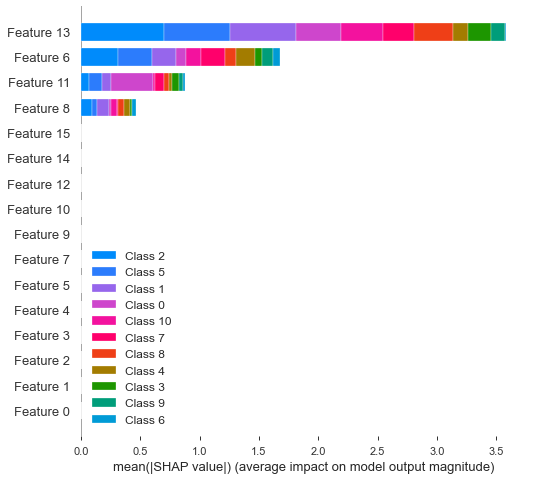

In [86]:
# feature importance plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
Ward_Type, Bed_Grade, Type_of_Admission, Visitors_with_Patient, Admission_Deposit

In [42]:
# Partitioning the features and the target

X = pd.DataFrame(train_data[["Ward_Type", "Bed_Grade", "Type_of_Admission", "Visitors_with_Patient", "Admission_Deposit"]])
y = train_data['Stay'].values

In [43]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=2018)

In [44]:
params = { 'iterations':5,
         'learning_rate':0.5,
         'depth':2,
         'eval_metric':'AUC',
         'verbose':True
         }

model_classifier = CatBoostClassifier(**params)
model_classifier.fit(X_train,y_train,
                    eval_set=(X_test,y_test),
                    use_best_model = True,
                    plot=True
                    );

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=2]="Urgent": Cannot convert 'b'Urgent'' to float

In [45]:
y_pred = model_classifier.predict(X_test)
y_pred

CatBoostError: There is no trained model to use predict(). Use fit() to train model. Then use this method.

In [169]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
c_m = confusion_matrix(y_test , y_pred,labels=np.unique(y_pred))
c_r = classification_report(y_test , y_pred, labels=np.unique(y_pred))
a_c = accuracy_score(y_test , y_pred)

print(c_m , c_r , a_c)

[[ 4606 16928   840   893    21]
 [ 4133 21364   457   447    25]
 [ 1806  8452  2849  3245   209]
 [  656  2332  2790  4409   281]
 [   75   182   183   819   736]]                     precision    recall  f1-score   support

             11-20       0.31      0.20      0.24     23288
             21-30       0.37      0.81      0.51     26426
             31-40       0.33      0.17      0.23     16561
             51-60       0.35      0.42      0.38     10468
More than 100 Days       0.40      0.37      0.38      1995

         micro avg       0.36      0.43      0.39     78738
         macro avg       0.35      0.39      0.35     78738
      weighted avg       0.34      0.43      0.35     78738
 0.35552485031193737


In [170]:
pd.DataFrame(X_train)

Ward_Type  Bed_Grade  Type_of_Admission  Visitors_with_Patient  \
40698   -1.104294        0.0           1.766778               0.406821   
170653   0.138476        0.0           0.315306              -0.729304   
157481   1.381246        0.0           1.766778               0.406821   
277394   1.381246        0.0           0.315306              -0.729304   
58223    0.138476        0.0           0.315306              -0.161242   
...           ...        ...                ...                    ...   
10388   -1.104294        0.0           0.315306              -0.729304   
302236   0.138476        0.0          -1.136165              -0.161242   
115605   0.138476        0.0           0.315306              -0.729304   
84745    0.138476        0.0           1.766778              -0.729304   
107770   1.381246        0.0          -1.136165              -0.729304   

        Admission_Deposit  
40698           -0.291084  
170653          -0.675843  
157481           1.484013  
277394          -0.491828  
58223           -0.296660  
...                   ...  
10388            0.139215  
302236           0.040701  
115605          -0.358928  
84745            0.324159  
107770          -0.315247  

[222906 rows x 5 columns]

In [171]:
train_data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed_Grade',
       'patientid', 'City_Code_Patient', 'Type_of_Admission',
       'Severity of Illness', 'Visitors_with_Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [172]:
import joblib
joblib.dump(model_classifier,'boost_covid.pkl')

['boost_covid.pkl']

In [173]:
import pickle
pickle_out=open("boost_covid.pkl","wb")
pickle.dump(model_classifier,pickle_out)
pickle_out.close()

In [177]:
from tkinter import*
from PIL import ImageTk, Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle
root=Tk()
#root.geometry("500x500")
root.configure(background="White")

def model(Ward_Type, Bed_Grade, Type_of_Admission, Visitors_with_Patient, Admission_Deposit):
    loaded_model = pickle.load(open("boost_covid.pkl", "rb"))
    prediction = loaded_model.predict([[Ward_Type, Bed_Grade, Type_of_Admission,Visitors_with_Patient, Admission_Deposit]])  #order important
   
    if prediction != [0]:
        notif1.configure(text=prediction)
   
        
Head1 = Label(root, text="AIS Solutions PVT LTD", font=('Helvetica',24,"bold")).pack()
Head2 = Label(root,text="Covid 19",font=('Helvetica',15,'bold'),relief="solid").pack()#pady=(10,0))

Ward_Type=Label(root,text="Ward_Type",font=('Helvetica',10,'bold'),bg="light green",relief="solid",width=18).pack()#pady=(20,0))
Ward_Type_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
Ward_Type_input.pack()

Bed_Grade =Label(root,text="Bed Grade",font=('Helvetica',10,'bold'),bg="light green",relief="solid",width=18).pack()#pady=(30,0))
Bed_Grade_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
Bed_Grade_input.pack()

Type_of_Admission=Label(root,text="Type of Admission",font=('Helvetica',10,'bold'),bg="light green",relief="solid",width=18).pack()#pady=(30,0))
Type_of_Admission_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
Type_of_Admission_input.pack()

Visitors_with_Patient =Label(root,text="Visitors with Patient",font=('Helvetica',10,'bold'),bg="light green",relief="solid",width=18).pack()#pady=(40,0))
Visitors_with_Patient_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
Visitors_with_Patient_input.pack()

Admission_Deposit=Label(root,text="Admission_Deposit",font=('Helvetica',10,'bold'),bg="light green",relief="solid",width=18).pack()#pady=(20,0))
Admission_Deposit_input=Entry(root,bd=2,width="30",font=("Arial sans MS",14))
Admission_Deposit_input.pack()



but1 = Button(root,text="Prediction",width="20", height="2",command=lambda: model(Ward_Type_input.get(),Bed_Grade_input.get(),Type_of_Admission_input.get(),Visitors_with_Patient_input.get(),Admission_Deposit_input.get()))
notif1 = Label(root, text="",font=("Arial sans MS",14,"bold"))

but1.pack()#pady="40")
notif1.pack(pady=(40,0))
root.resizable(0,0)
root.mainloop()